# Fitting

## Import the library

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## Model class

In [2]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 1, bias=False)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

## Data and plot function

In [3]:
def true_fun(X):
    noise = np.random.rand(X.shape[0]) * 0.4 - 0.2
    return np.cos(1.5 * np.pi * X) + X + noise

def plot_results(model):
    x = np.linspace(0, 5, 100)
    input_x = torch.from_numpy(x).float().unsqueeze(1)
    plt.plot(x, true_fun(x), label="Truth")
    plt.plot(x, model(input_x).detach().numpy(), label="Prediction")
    plt.legend(loc='lower right',fontsize=15)
    plt.xlim((0, 5))
    plt.ylim((-1, 5))
    plt.grid()

## main

In [4]:
def main():
    data_x = np.random.rand(10000) * 5 # 0~5 사이 숫자 1만개를 샘플링하여 인풋으로 사용
    model = Model()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for step in range(10000):
        batch_x = np.random.choice(data_x, 32) # 랜덤하게 뽑힌 32개의 데이터로 mini-batch를 구성
        batch_x_tensor = torch.from_numpy(batch_x).float().unsqueeze(1)
        pred = model(batch_x_tensor)

        batch_y = true_fun(batch_x)
        truth = torch.from_numpy(batch_y).float().unsqueeze(1)
        loss = F.mse_loss(pred, truth) # 손실 함수인 MSE를 계산하는 부분

        optimizer.zero_grad()
        loss.mean().backward() # 역전파를 통한 그라디언트 계산이 일어나는 부분
        optimizer.step() # 실제로 파라미터를 업데이트 하는 부분

    plot_results(model)

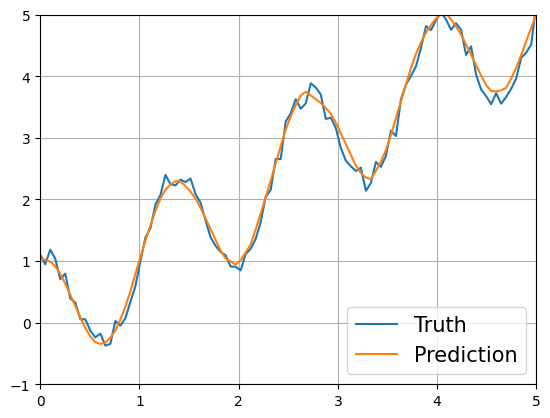

In [5]:
if __name__ == '__main__':
    main()